In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.cloud import storage
from io import BytesIO
from PIL import Image
import numpy as np

# Initialize client
client = storage.Client()

# Set your bucket and prefix
bucket_name = 'nutrition5k_dataset'
bucket = client.get_bucket(bucket_name)

# List files (images or videos)
blobs = bucket.list_blobs(prefix='images')  # or 'videos'

for blob in blobs:
    if blob.name.endswith('.jpg') or blob.name.endswith('.png'):
        # Read image as bytes
        img_bytes = blob.download_as_bytes()

        # Convert to PIL image
        img = Image.open(BytesIO(img_bytes)).convert('RGB')
        img = img.resize((224, 224))  # Resize if needed
        img_array = np.array(img)

        # Now use img_array in your CNN model
        break  # Remove this line to load more images


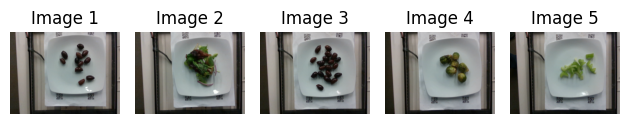

In [5]:
from google.cloud import storage
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Initialize client
client = storage.Client()
bucket_name = "nutrition5k_dataset"
bucket = client.bucket(bucket_name)

# Folder prefix (use exact path from screenshot)
prefix = "nutrition5k_dataset/imagery/realsense_overhead/"

# List all blobs in the folder (recursively)
blobs = bucket.list_blobs(prefix=prefix)

# Filter only rgb.png files
rgb_blobs = [blob for blob in blobs if blob.name.endswith("rgb.png")]

# Display first 5 rgb.png files
for i, blob in enumerate(rgb_blobs[:5]):
    img_data = blob.download_as_bytes()
    img = Image.open(BytesIO(img_data))

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()


In [ ]:
# # Display first 5 rgb.png files
# f, axs = plt.subplots(1, 5, figsize=(20, 20))
# for i, blob in enumerate(random.sample(rgb_blobs, images_to_show)):
#     img_data = blob.download_as_bytes()
#     img = Image.open(BytesIO(img_data))

#     plt.subplot(1, 5, i+1)
#     plt.imshow(img)
#     plt.axis("off")
#     plt.title(f"{blob.name.split('/')[-2]}")

# plt.tight_layout()
# plt.show()

In [12]:
from google.cloud import storage
import pandas as pd
from io import StringIO

# Initialize GCS client
client = storage.Client()
bucket_name = "nutrition5k_dataset"
bucket = client.bucket(bucket_name)

# List of metadata files (from screenshot)
metadata_files = [
    # "nutrition5k_dataset/metadata/dish_metadata_cafe1.csv",
    # "nutrition5k_dataset/metadata/dish_metadata_cafe2.csv",
    "nutrition5k_dataset/metadata/ingredients_metadata.csv"
]

# Loop over files and read into DataFrame
for file_path in metadata_files:
    blob = bucket.blob(file_path)
    content = blob.download_as_text()  # CSV is text-based

    df = pd.read_csv(StringIO(content))

    print(f"\n📄 Displaying: {file_path}")
    # print(content)
    display(df.head())  # shows first 5 rows of each



📄 Displaying: nutrition5k_dataset/metadata/ingredients_metadata.csv


,ingr,id,cal/g,fat(g),carb(g),protein(g)
0,cottage cheese,1,0.980,0.043,0.034,0.110
1,strawberries,2,0.330,0.003,0.080,0.007
2,garden salad,3,0.646,0.034,0.032,0.061
3,bacon,4,5.410,0.420,0.014,0.370
4,potatoes,5,0.770,0.001,0.170,0.020


In [21]:
from google.cloud import storage
import pandas as pd
from io import StringIO

# Initialize GCS client
client = storage.Client()
bucket_name = "nutrition5k_dataset"
bucket = client.bucket(bucket_name)

# List of metadata files (from screenshot)
metadata_files = [
    "nutrition5k_dataset/metadata/dish_metadata_cafe1.csv",
    # "nutrition5k_dataset/metadata/dish_metadata_cafe2.csv",
    # "nutrition5k_dataset/metadata/ingredients_metadata.csv"
]

# Loop over files and read into DataFrame
for file_path in metadata_files:
    blob = bucket.blob(file_path)
    content = blob.download_as_text()  # CSV is text-based

    # df = pd.read_csv(StringIO(content))

    print(f"\n📄 Displaying: {file_path}")
    print(content[:1000])
    # display(df.head())  # shows first 5 rows of each



📄 Displaying: nutrition5k_dataset/metadata/dish_metadata_cafe1.csv
dish_1561662216,300.794281,193.000000,12.387489,28.218290,18.633970,ingr_0000000508,soy sauce,3.398568,1.80124104,0.020391408,0.166529832,0.275284008,ingr_0000000122,garlic,2.124105,3.16491645,0.010620525,0.70095465,0.13594272,ingr_0000000026,white rice,8.496420,11.045346,0.02548926,2.3789976,0.22940334,ingr_0000000524,parsley,0.213397,0.079170287,0.001707176,0.013657408,0.006188513,ingr_0000000094,onions,1.707173,0.6828692,0.001707173,0.15364557,0.018778903,ingr_0000000023,brown rice,68.000000,75.48,0.612,15.64,1.768,ingr_0000000189,vinegar,0.853586,0.0,0.0,0.0,0.0,ingr_0000000054,apple,4.267931,2.21932412,0.008535862,0.59751034,0.012803793,ingr_0000000029,mixed greens,21.339657,5.97510396,0.085358628,1.131001821,0.469472454,ingr_0000000328,sugar,6.372315,24.7245822,0.0,6.372315,0.0,ingr_0000000291,salt,0.531519,0.0,0.0,0.0,0.0,ingr_0000000520,lemon juice,0.853586,0.14510962,0.0,0.047800816,0.003414344,ingr_0000000161

In [27]:
from google.cloud import storage
import pandas as pd
from io import StringIO
import csv

# Initialize GCS client
client = storage.Client()
bucket_name = "nutrition5k_dataset"
bucket = client.bucket(bucket_name)

# Path to the metadata file
file_path = "nutrition5k_dataset/metadata/dish_metadata_cafe1.csv"

# Get the file from GCS
blob = bucket.blob(file_path)
content = blob.download_as_text()

# Lists to store parsed data
dish_data = []
ingredients_data = []

# Read CSV line-by-line
reader = csv.reader(StringIO(content))
for row in reader:
    # Parse dish-level info
    dish_id = row[0]
    total_mass = float(row[1])
    total_calories = float(row[2])
    total_fat = float(row[3])
    total_carb = float(row[4])
    total_protein = float(row[5])

    dish_data.append({
        "dish_id": dish_id,
        "total_mass": total_mass,
        "total_calories": total_calories,
        "total_fat": total_fat,
        "total_carb": total_carb,
        "total_protein": total_protein
    })

    # Each ingredient block is 7 fields, starting from index 6
    for i in range(6, len(row), 7):
        try:
            ingredients_data.append({
                "dish_id": dish_id,
                "ingr_id": row[i],
                "ingr_name": row[i + 1],
                "grams": float(row[i + 2]),
                "calories": float(row[i + 3]),
                "fat": float(row[i + 4]),
                "carb": float(row[i + 5]),
                "protein": float(row[i + 6])
            })
        except IndexError:
            print(f"⚠️ Skipping incomplete ingredient block for dish {dish_id}")
            continue

# Convert to pandas DataFrames
df_dishes = pd.DataFrame(dish_data)
df_ingredients = pd.DataFrame(ingredients_data)

# Display samples
print("✅ Dish Metadata:")
display(df_dishes.head())

print("✅ Ingredient Metadata:")
display(df_ingredients.head())


✅ Dish Metadata:


,dish_id,total_mass,total_calories,total_fat,total_carb,total_protein
0,dish_1561662216,300.794281,193.0,12.387489,28.218290,18.633970
1,dish_1562688426,137.569992,88.0,8.256000,5.190000,10.297000
2,dish_1561662054,419.438782,292.0,23.838249,26.351543,25.910593
3,dish_1562008979,382.936646,290.0,22.224644,10.173570,35.345387
4,dish_1560455030,20.590000,103.0,0.148000,4.625000,0.956000


✅ Ingredient Metadata:


,dish_id,ingr_id,ingr_name,grams,calories,fat,carb,protein
0,dish_1561662216,ingr_0000000508,soy sauce,3.398568,1.801241,0.020391,0.166530,0.275284
1,dish_1561662216,ingr_0000000122,garlic,2.124105,3.164916,0.010621,0.700955,0.135943
2,dish_1561662216,ingr_0000000026,white rice,8.496420,11.045346,0.025489,2.378998,0.229403
3,dish_1561662216,ingr_0000000524,parsley,0.213397,0.079170,0.001707,0.013657,0.006189
4,dish_1561662216,ingr_0000000094,onions,1.707173,0.682869,0.001707,0.153646,0.018779


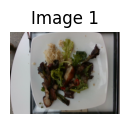

In [28]:
from google.cloud import storage
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Initialize client
client = storage.Client()
bucket_name = "nutrition5k_dataset"
bucket = client.bucket(bucket_name)

# Folder prefix (use exact path from screenshot)
prefix = "nutrition5k_dataset/imagery/realsense_overhead/"

# List all blobs in the folder (recursively)
blobs = bucket.list_blobs(prefix=prefix)

# Filter only rgb.png files
rgb_blobs = [blob for blob in blobs if blob.name.endswith("dish_1561662216/rgb.png")]

# Display first 5 rgb.png files
for i, blob in enumerate(rgb_blobs[:1]):
    img_data = blob.download_as_bytes()
    img = Image.open(BytesIO(img_data))

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()
